In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from datetime import timedelta

In [2]:
df1=pd.read_csv('uber-raw-data-apr14.csv',sep=',')
df2=pd.read_csv('uber-raw-data-may14.csv',sep=',')
df3=pd.read_csv('uber-raw-data-jun14.csv',sep=',')
df4=pd.read_csv('uber-raw-data-jul14.csv',sep=',')
df5=pd.read_csv('uber-raw-data-aug14.csv',sep=',')
df6=pd.read_csv('uber-raw-data-sep14.csv',sep=',')

In [4]:
dataframe=[df1,df2,df3,df4,df5,df6]

In [5]:
merged_df = pd.concat([df1,df2,df3,df4,df5,df6],ignore_index=True)

In [6]:
merged_df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [7]:
merged_df.tail()

,Date/Time,Lat,Lon,Base
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764
4534326,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [8]:
merged_df.shape

(4534327, 4)

In [9]:
merged_df.describe()

,Lat,Lon
count,4.534327e+06,4.534327e+06
mean,4.073926e+01,-7.397302e+01
std,3.994991e-02,5.726670e-02
min,3.965690e+01,-7.492900e+01
25%,4.072110e+01,-7.399650e+01
50%,4.074220e+01,-7.398340e+01
75%,4.076100e+01,-7.396530e+01
max,4.211660e+01,-7.206660e+01


In [10]:
merged_df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [11]:
df_time = pd.to_datetime(merged_df['Date/Time'],format='%m/%d/%Y %H:%M:%S')

In [12]:
merged_df['only_date'] = df_time.dt.date
merged_df['date'] = df_time
merged_df['month'] = df_time.dt.month
merged_df['days_of_week'] = df_time.dt.dayofweek
merged_df['hours'] = df_time.dt.hour
merged_df['dow_name'] = df_time.dt.day_name()

In [13]:
merged_df.head()

,Date/Time,Lat,Lon,Base,only_date,date,month,days_of_week,hours,dow_name
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01,2014-04-01 00:11:00,4,1,0,Tuesday
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01,2014-04-01 00:17:00,4,1,0,Tuesday
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01,2014-04-01 00:21:00,4,1,0,Tuesday
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01,2014-04-01 00:28:00,4,1,0,Tuesday
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01,2014-04-01 00:33:00,4,1,0,Tuesday


In [14]:
merged_df.tail()

,Date/Time,Lat,Lon,Base,only_date,date,month,days_of_week,hours,dow_name
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764,2014-09-30,2014-09-30 22:57:00,9,1,22,Tuesday
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764,2014-09-30,2014-09-30 22:57:00,9,1,22,Tuesday
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2014-09-30,2014-09-30 22:58:00,9,1,22,Tuesday
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764,2014-09-30,2014-09-30 22:58:00,9,1,22,Tuesday
4534326,9/30/2014 22:58:00,40.7140,-73.9496,B02764,2014-09-30,2014-09-30 22:58:00,9,1,22,Tuesday


<AxesSubplot:xlabel='days_of_week,dow_name'>

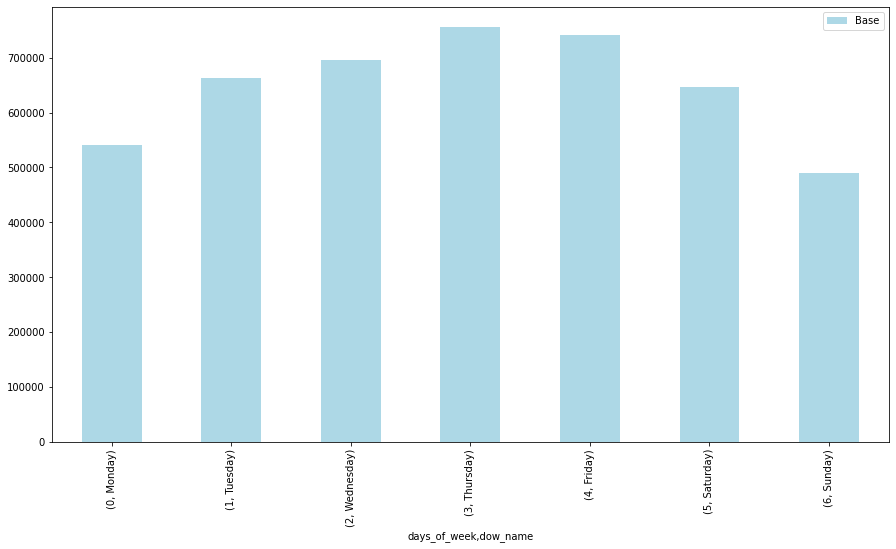

In [15]:
uber_weekdays = merged_df.pivot_table(index=['days_of_week','dow_name'],values='Base', aggfunc='count')
uber_weekdays.plot(kind='bar',color='lightblue', figsize=(15,8))

<AxesSubplot:xlabel='hours'>

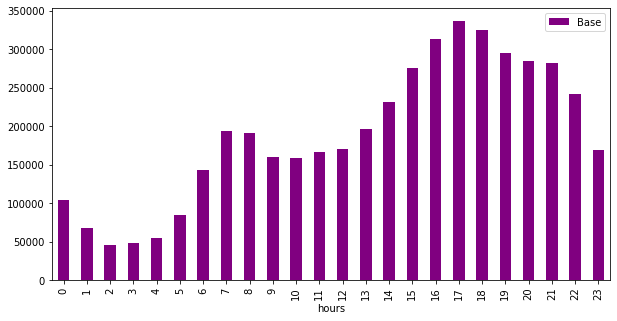

In [16]:
uber_monthly = merged_df.pivot_table(index=['hours'],values='Base', aggfunc='count')
uber_monthly.plot(kind='bar',color='purple', figsize=(10,5))

In [17]:
df= merged_df.drop(columns = ['month','days_of_week','Base', 'dow_name','hours','Lon','Lat'])

In [18]:
df.head()

,Date/Time,only_date,date
0,4/1/2014 0:11:00,2014-04-01,2014-04-01 00:11:00
1,4/1/2014 0:17:00,2014-04-01,2014-04-01 00:17:00
2,4/1/2014 0:21:00,2014-04-01,2014-04-01 00:21:00
3,4/1/2014 0:28:00,2014-04-01,2014-04-01 00:28:00
4,4/1/2014 0:33:00,2014-04-01,2014-04-01 00:33:00


In [19]:
uber_d=df.groupby(pd.Grouper(key='only_date')).count()

In [20]:
uber_d.head()

,Date/Time,date
only_date,,
2014-04-01,14546,14546
2014-04-02,17474,17474
2014-04-03,20701,20701
2014-04-04,26714,26714
2014-04-05,19521,19521


In [21]:
uber_d=uber_d.drop('date',axis='columns')

In [22]:
uber_dd=uber_d.drop('Date/Time',axis='columns')

In [23]:
uber_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 2014-04-01 to 2014-09-30
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Date/Time  183 non-null    int64
dtypes: int64(1)
memory usage: 2.9+ KB


In [24]:
183*90/100

164.7

In [25]:
train_d = uber_d[:][:165]                    
test_d = uber_d[:][166:]
test_ts_d = uber_dd[:][166:]

In [26]:
train_d

,Date/Time
only_date,
2014-04-01,14546
2014-04-02,17474
2014-04-03,20701
2014-04-04,26714
2014-04-05,19521
...,...
2014-09-08,30360
2014-09-09,34560
2014-09-10,35910


In [27]:
test_d

,Date/Time
only_date,
2014-09-14,28122
2014-09-15,29454
2014-09-16,36092
2014-09-17,35531
2014-09-18,40274
2014-09-19,41017
2014-09-20,38864
2014-09-21,28620
2014-09-22,28312


In [28]:
test_ts_d

""
only_date
2014-09-14
2014-09-15
2014-09-16
2014-09-17
2014-09-18
2014-09-19
2014-09-20
2014-09-21
2014-09-22


In [29]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
hat_avg = test_d.copy()
fi = ExponentialSmoothing(np.asarray(train_d['Date/Time']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
hat_avg['Holt_Winter'] = fi.forecast(len(test_d))

C:\Users\milin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\milin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


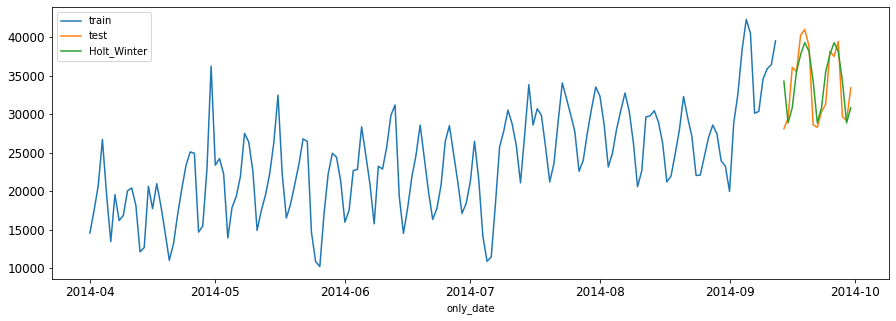

In [31]:
plt.figure(figsize=(15,5))
train_d['Date/Time'].plot(kind='line',figsize=(15,8),fontsize=12,label='train')
test_d['Date/Time'].plot(figsize=(15,5),fontsize=12,label='test')
plt.plot(hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend()
plt.show()

In [32]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from matplotlib.pylab import rcParams

In [33]:
from matplotlib.pylab import rcParams

In [35]:
rolmean = uber_d['Date/Time'].rolling(24).mean()
rolstd = uber_d['Date/Time'].rolling(24).std()

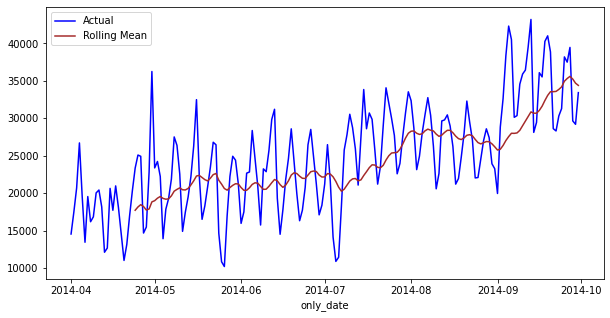

In [37]:
rcParams['figure.figsize']=(10,5)
uber_d['Date/Time'].plot(kind='line', color = "blue", label = "Actual")
rolmean.plot(kind='line', color = "brown", label = "Rolling Mean")
plt.legend()

In [38]:
Train_log = np.log(train_d['Date/Time'])
valid_log = np.log(test_d['Date/Time'])

In [39]:
moving_avg = Train_log.rolling(24).mean()

In [40]:
train_log_moving_diff = Train_log - moving_avg
train_log_moving_diff.dropna(inplace = True)

In [41]:
rolmean = train_log_moving_diff.rolling(24).mean()
rolstd = train_log_moving_diff.rolling(24).std()


In [42]:
train_log_diff = Train_log - Train_log.shift(1)

In [43]:
decomposition = seasonal_decompose(pd.DataFrame(Train_log)['Date/Time'].values, freq = 24)
plt.style.use('default')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

C:\Users\milin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


In [44]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['Date'] = Train_log.index
train_log_decompose.set_index('Date', inplace = True)
train_log_decompose.dropna(inplace = True)

In [46]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_log_diff.dropna(), nlags = 25)
lag_pacf = pacf(train_log_diff.dropna(), nlags = 25, method= "ols")

C:\Users\milin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


C:\Users\milin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\milin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


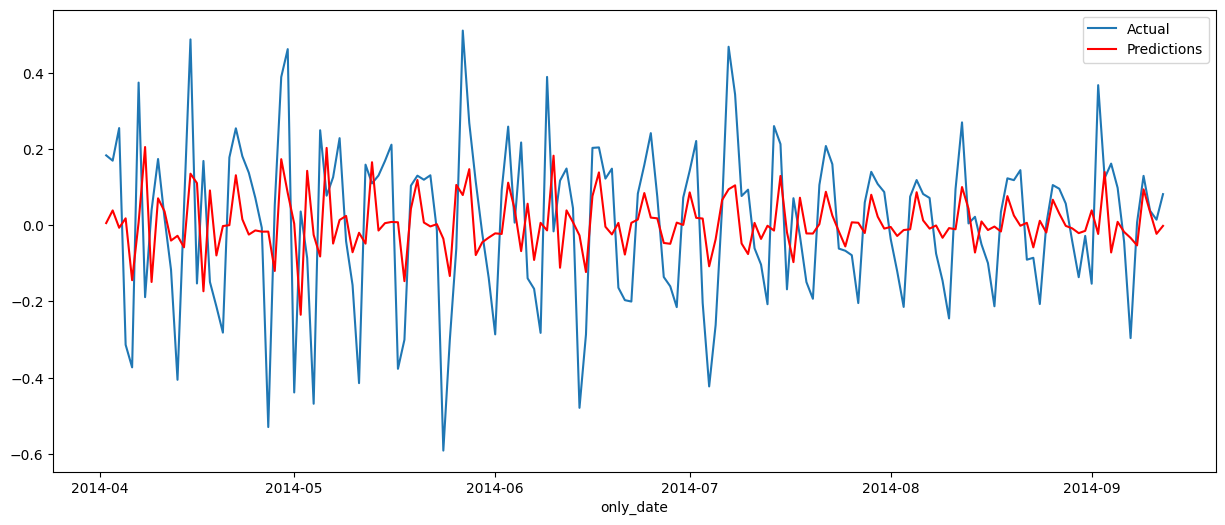

In [48]:
plt.figure(figsize = (15,6))
model = ARIMA(Train_log, order = (2,1,0)) 
results_AR = model.fit(disp=-1)
train_log_diff.dropna().plot(kind='line', label = "Actual")
results_AR.fittedvalues.plot(kind='line', color = 'red', label = 'Predictions')
plt.legend(loc = 'upper right')
plt.show()

C:\Users\milin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\milin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


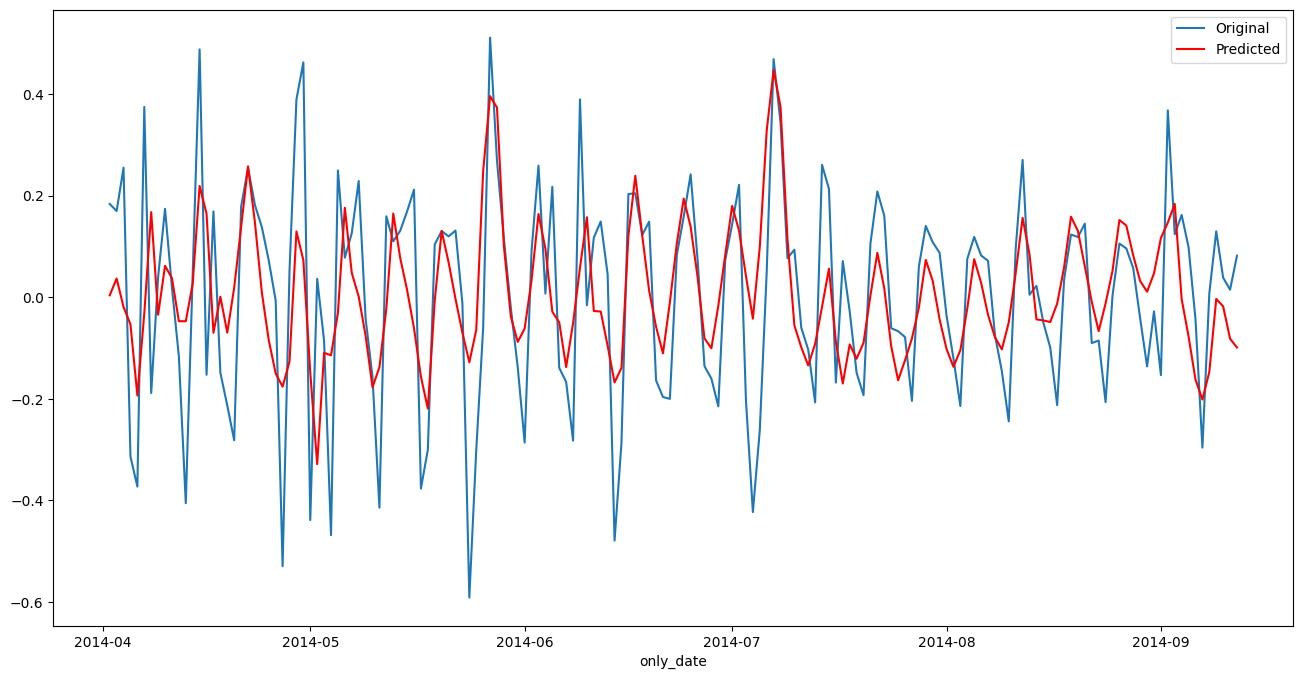

In [49]:
plt.figure(figsize = (16,8))
model = ARIMA(Train_log, order = (2,1,1))
results_ARIMA = model.fit(disp=-1)
train_log_diff.dropna().plot(kind='line',  label='Original')
results_ARIMA.fittedvalues.plot(kind='line', color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

In [63]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Date/Time'])[0], index = given_set.index)
    predict = np.exp(predict_base)
    
    plt.plot(given_set['Date/Time'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Date/Time']))/given_set.shape[0]))
    plt.show()

In [64]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Date/Time'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Date/Time']))/given_set.shape[0]))
    plt.show()

In [65]:
ARIMA_predict_diff=results_ARIMA.predict(len(train_d))

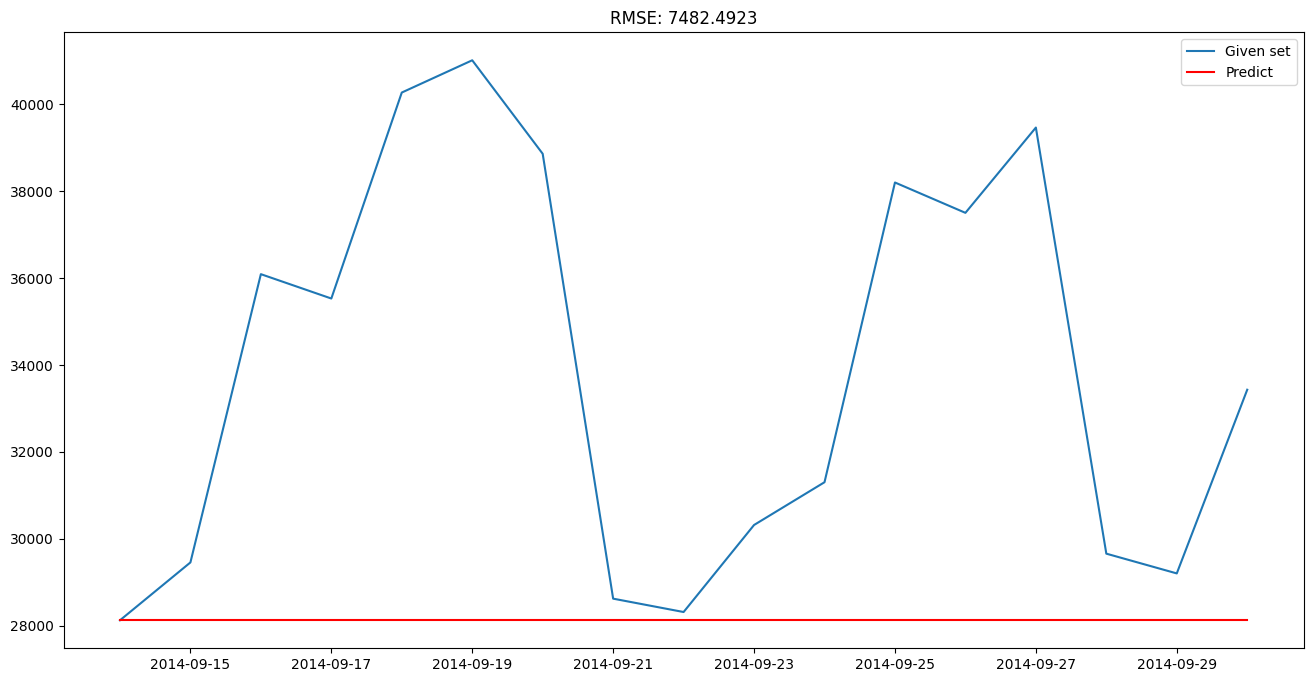

In [66]:
plt.figure(figsize = (16,8))
check_prediction_diff(ARIMA_predict_diff,test_d)

In [72]:
uber_count=df.groupby(pd.Grouper(key='date')).count()
uber_count= uber_count.drop(columns = ['only_date'])
print(uber_count.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260093 entries, 2014-04-01 00:11:00 to 2014-09-30 03:26:00
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Date/Time  260093 non-null  int64
dtypes: int64(1)
memory usage: 4.0 MB
None


In [73]:
260093*90/100

234083.7

In [74]:
train = uber_count[:][:234084] 
test = uber_count[:][234085:]

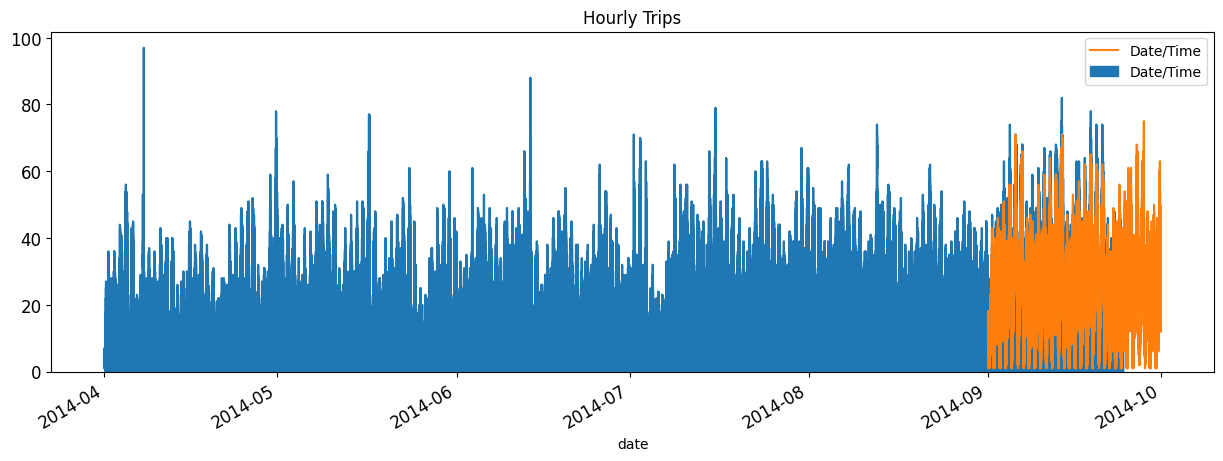

In [76]:
train['Date/Time'].plot(kind='area',figsize=(12,8), title= 'Hourly Trips', fontsize=14)
test['Date/Time'].plot(figsize=(15,5), title= 'Hourly Trips', fontsize=12)
plt.legend()
plt.show()

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [83]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model

Using TensorFlow backend.
C:\Users\milin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\milin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\milin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\milin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [84]:
K.clear_session()

In [85]:
model = Sequential()
model.add(Dense(9, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)


Epoch 1/20
234083/234083 [==============================] - 133s 570us/step - loss: 0.0028
Epoch 2/20
234083/234083 [==============================] - 135s 575us/step - loss: 0.0029
Epoch 3/20
234083/234083 [==============================] - 123s 525us/step - loss: 0.0029
Epoch 4/20
234083/234083 [==============================] - 131s 559us/step - loss: 0.0029
Epoch 5/20
234083/234083 [==============================] - 130s 557us/step - loss: 0.0029
Epoch 6/20
234083/234083 [==============================] - 121s 516us/step - loss: 0.0029
Epoch 00006: early stopping


In [89]:
y_pred_test_ann = model.predict(X_test)
y_train_pred_ann = model.predict(X_train)
rmse = sqrt(mean_squared_error(y_train,y_train_pred_ann))
print("Train : {:0.3f}".format(rmse))

rmse = sqrt(mean_squared_error(y_test,y_pred_test_ann))
print("Test : {:0.3f}".format(rmse))

model.save('Uber_Data_ANN')

Train : 0.089
Test : 0.093


In [90]:
model_ann = load_model('Uber_Data_ANN')

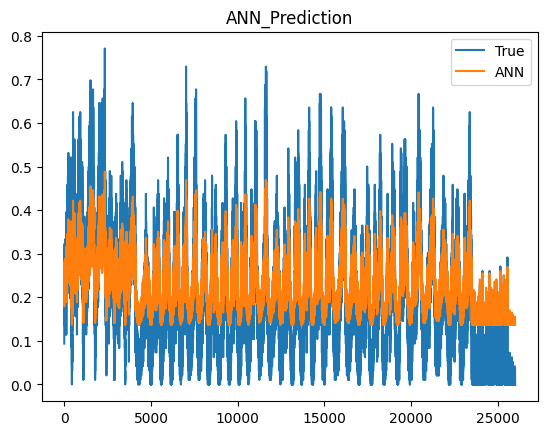

In [92]:
y_pred_test_ANN = model_ann.predict(X_test)
plt.plot(y_test, label='True')
plt.plot(y_pred_test_ANN, label='ANN')
plt.title("ANN_Prediction")
plt.legend()
plt.show()

In [94]:
score_ann= model_ann.evaluate(X_test, y_test, batch_size=1)
print('ANN: %f'%score_ann)

26007/26007 [==============================] - 5s 193us/step
ANN: 0.008619
